In [44]:
import numpy as np
import math
import random
from simple_benchmark import benchmark

In [1]:
2+2

4

## 4

In [6]:
%time 2+2

Wall time: 0 ns


4

In [9]:
%%time 
n=2+2
n*2

Wall time: 0 ns


8

In [10]:
n=10**6
%time sum(range(n))

Wall time: 39.9 ms


499999500000

In [11]:
%%time
l=list(range(n))
sum(l)

Wall time: 54.1 ms


499999500000

## 5

In [12]:
n=10**6
%timeit sum(range(n))

39 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit
l=list(range(n))
sum(l)

65.3 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
n=10**6
%timeit -r 10 -n 12 sum(range(n))

41.2 ms ± 14.4 ms per loop (mean ± std. dev. of 10 runs, 12 loops each)


In [16]:
%%timeit -r 10 -n 12
l=list(range(n))
sum(l)

58.6 ms ± 17.6 ms per loop (mean ± std. dev. of 10 runs, 12 loops each)


## 6

In [17]:
n=10**6
t=%timeit -o sum(range(n))
print(t.all_runs)

31 ms ± 67.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
[0.3092630000001009, 0.3093380000000252, 0.31022140000004583, 0.3110378999999739, 0.30917109999973036, 0.3103448000001663, 0.3092458000000988]


In [18]:
t.best

0.030917109999973037

## 7

1)

In [22]:
%time math.sinh(math.pi/4)

Wall time: 0 ns


0.8686709614860095

In [23]:
%%time
math.sinh(math.pi/4)

Wall time: 0 ns


0.8686709614860095

In [39]:
x1=%timeit -r 10 -o math.sinh(math.pi/4)
x1.best

320 ns ± 118 ns per loop (mean ± std. dev. of 10 runs, 1000000 loops each)


2.2375289999990856e-07

In [38]:
%%timeit -r 10  
math.sinh(math.pi/4)

460 ns ± 192 ns per loop (mean ± std. dev. of 10 runs, 1000000 loops each)


<TimeitResult : 460 ns ± 192 ns per loop (mean ± std. dev. of 10 runs, 1000000 loops each)>

2)

In [29]:
n=10000

In [87]:
%time math.sinh((1/n)* sum([random.random() for i in range(n)]))

Wall time: 0 ns


0.5220543866350802

In [40]:
x2= %timeit -r 10 -o math.sinh((1/n)* sum([random.random() for i in range(n)]))
x2.best

1.7 ms ± 424 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


0.0009572125000004235

In [32]:
%%time 
math.sinh(sum([random.random() for i in range(n)])/n)

Wall time: 0 ns


0.5163962199965388

In [88]:
%%timeit -r 10 
math.sinh(sum([random.random() for i in range(n)])/n)

951 µs ± 54 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


3)

In [34]:
%time (sum([math.sinh(random.random()) for i in range(n)]))/n

Wall time: 4 ms


0.5494769864533531

In [81]:
x3=%timeit -r 10 -o (sum([math.sinh(random.random()) for i in range(n)]))/n
x3.best

2.48 ms ± 35.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


0.002376223999999638

In [36]:
%%time
(sum([math.sinh(random.random()) for i in range(n)]))/n

Wall time: 4 ms


0.5421207548651602

In [82]:
%%timeit -r 10 
(sum([math.sinh(random.random()) for i in range(n)]))/n

2.48 ms ± 45.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<TimeitResult : 2.48 ms ± 45.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)>

| Вираз  | Автооцінювання  | %time  |%%time        | %timeit (min)   | %%timeit       |
|:------:|:---------------:|:------:|:-----------: |:---------------:|:--------------:|
| 1      | 16ms            |   0ns  |     0ns      | 223ns |460ns |
| 2      | 20ms        |     0ns   |0ns     | 0.957ms |2.28ms |
| 3      | 16ms        |   4ms    |4ms      | 2.46ms |3.93ms |

## 10

In [58]:
def func2_list(n):
      return math.sinh((1/n)* sum([random.random() for i in range(n)]))
def func3_list(n):
      return (1/n)*sum([math.sinh(random.random()) for i in range(n)])
def func4_list(n):
      return (1/n**2)*sum([sum([random.random() for i in range(n)]) for i in range(n)])

## 11

In [60]:
def func2_np(n):
      return np.sinh((1/n)*np.sum(np.random.rand(n)))
def func3_np(n):
      return (1/n)*np.sum(np.sinh(np.random.rand(n)))
def func4_np(n):
      return (1/n**2)*np.sum(np.random.rand(n,n))

## 12

            func2_list    func3_list  func2_np  func3_np
1         8.471910e-07  8.526786e-07  0.000007  0.000006
10        1.637288e-06  2.905882e-06  0.000007  0.000006
100       9.250000e-06  2.280000e-05  0.000008  0.000008
1000      9.450000e-05  2.331000e-04  0.000015  0.000028
10000     9.237000e-04  2.322000e-03  0.000081  0.000215
100000    9.852900e-03  2.352650e-02  0.000732  0.002654
1000000   1.336583e-01  2.741681e-01  0.010869  0.027836
10000000  1.383256e+00  2.809767e+00  0.115785  0.285193
Wall time: 23.2 s


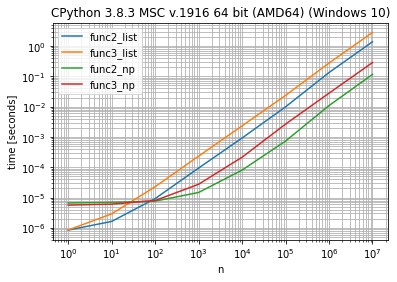

In [76]:
%%time
b = benchmark([func2_list,func3_list,func2_np,func3_np],
              arguments = {10**i: 10**i for i in range(8)}, argument_name='n')
print(b)
b.plot()

## 13

         func2_list    func3_list  func4_list  func2_np  func3_np  func4_np
1      8.505882e-07  8.486487e-07    0.000001  0.000007  0.000006  0.000006
10     1.649153e-06  2.897059e-06    0.000014  0.000007  0.000006  0.000007
100    9.200000e-06  2.265000e-05    0.000866  0.000008  0.000008  0.000080
1000   9.360000e-05  2.306000e-04    0.093245  0.000015  0.000028  0.010857
10000  9.186000e-04  2.293700e-03    9.129026  0.000173  0.000459  1.152494
Wall time: 50.4 s


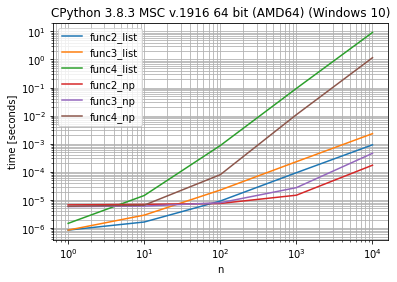

In [80]:
%%time
b = benchmark([func2_list,func3_list,func4_list,func2_np,func3_np,func4_np],
              arguments = {10**i: 10**i for i in range(5)}, argument_name='n')
print(b)
b.plot()